In [22]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
databasePath = "../eICU/training/"
exportPath = "../eICU/training/"

In [7]:
finalFeatures = pd.read_csv(databasePath + '/finalFeatures.csv')
finalFeatures

,patientid,temperature_min,temperature_max,temperature_mean,temperature_std,temperature_kurtosis,temperature_skew,temperature_median,heartrate_min,heartrate_max,...,creatinine_skew,creatinine_median,urineoutputbyweight_min,urineoutputbyweight_max,urineoutputbyweight_mean,urineoutputbyweight_std,urineoutputbyweight_kurtosis,urineoutputbyweight_skew,urineoutputbyweight_median,diagnosis
0,1412030,38.1204,38.1204,38.1204,0.0000,0.0000,0.0000,38.1204,68.0,120.0,...,-1.4140,0.6875,6.9586,6.9586,6.9586,0.0000,0.0000,0.0000,6.9586,0.0
1,1412271,37.6965,38.1204,38.0819,0.1278,11.0000,-3.3166,38.1204,103.0,112.0,...,0.2131,1.4000,2.4331,2.4331,2.4331,0.0000,0.0000,0.0000,2.4331,1.0
2,1412290,38.1204,38.1204,38.1204,0.0000,0.0000,0.0000,38.1204,57.0,75.0,...,0.1274,1.2345,4.4543,4.4543,4.4543,0.0000,0.0000,0.0000,4.4543,0.0
3,1412660,37.4000,38.0000,37.7832,0.1822,-0.3726,-0.6013,37.8000,84.0,109.0,...,-0.5963,1.6136,0.8306,3.7375,3.6347,0.4814,21.5211,-4.7383,3.7375,0.0
4,1412840,38.1204,38.1204,38.1204,0.0000,0.0000,0.0000,38.1204,70.0,106.0,...,-0.0575,1.0584,0.6420,1.7976,1.5475,0.2748,2.0620,-1.6282,1.5956,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406022,33532516,32.2000,37.7000,35.3112,2.1057,-1.7574,-0.2178,36.6000,51.0,104.0,...,-0.0645,2.6469,0.0980,5.6373,1.0889,0.9895,3.4195,1.6831,0.8171,1.0
406023,33532517,32.2000,37.4000,34.5467,1.8862,-1.7703,0.2656,33.4000,51.0,104.0,...,0.1481,2.5493,0.0980,5.6373,0.9832,1.0570,3.9619,1.9491,0.6334,1.0
406024,33532518,32.2000,36.8000,34.1643,1.7398,-1.4068,0.6213,33.1000,60.0,104.0,...,0.0064,2.4888,0.0980,5.6373,1.0385,1.1231,2.9569,1.7434,0.6010,1.0
406025,33532540,38.1204,38.1204,38.1204,0.0000,0.0000,0.0000,38.1204,72.0,83.0,...,-2.1039,2.2769,0.3576,19.0703,3.7475,2.6719,13.1009,3.2470,2.3838,0.0


#### General Overview of Data

The data doesn't contain any null values since thye were all removed in the cleaning process. Hence, there is no need to recheck. 

In [8]:
print("Number of different patients: ", len(finalFeatures['patientid'].unique()))
print("Number of patient diagnosis: ", len(finalFeatures['patientid']))
print("Number of patients with sepsis: ", len(finalFeatures[finalFeatures['diagnosis'] == 1]))
print("Number of patients without sepsis: ", len(finalFeatures[finalFeatures['diagnosis'] == 0]))


Number of different patients:  198721
Number of patient diagnosis:  406027
Number of patients with sepsis:  155618
Number of patients without sepsis:  250409


It appears the data is unbalanced since the number of diagnosis with sepsis is far less than the number of diagnosis without sepsis. This could pose some porblems to the different classificaiton techniques that will be utilized including the nueral network. Hence, this unbalance must be handled appropraitely.

#### Plot of Sepsis  vs Not Sepsis

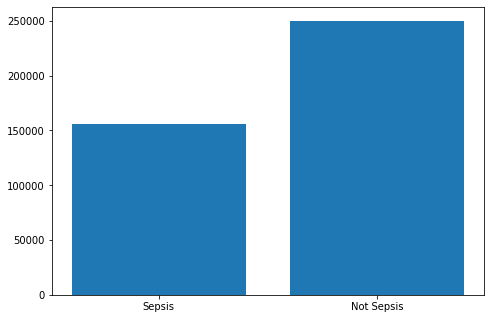

In [32]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1 ,1])
diagnosis = ['Sepsis', 'Not Sepsis']
count = [len(finalFeatures[finalFeatures['diagnosis'] == 1]),len(finalFeatures[finalFeatures['diagnosis'] == 0])]
ax.bar(diagnosis, count)
plt.show()

In [16]:
finalFeatures.dtypes

patientid                         int64
temperature_min                 float64
temperature_max                 float64
temperature_mean                float64
temperature_std                 float64
temperature_kurtosis            float64
temperature_skew                float64
temperature_median              float64
heartrate_min                   float64
heartrate_max                   float64
heartrate_mean                  float64
heartrate_std                   float64
heartrate_kurtosis              float64
heartrate_skew                  float64
heartrate_median                float64
respiration_min                 float64
respiration_max                 float64
respiration_mean                float64
respiration_std                 float64
respiration_kurtosis            float64
respiration_skew                float64
respiration_median              float64
systemicsystolic_min            float64
systemicsystolic_max            float64
systemicsystolic_mean           float64


All of the columns which contain patient features are of type float. Hence, a heatmap will be plotted to see if their are any correlation among features.

#### Correlation Heatmap on Dataset

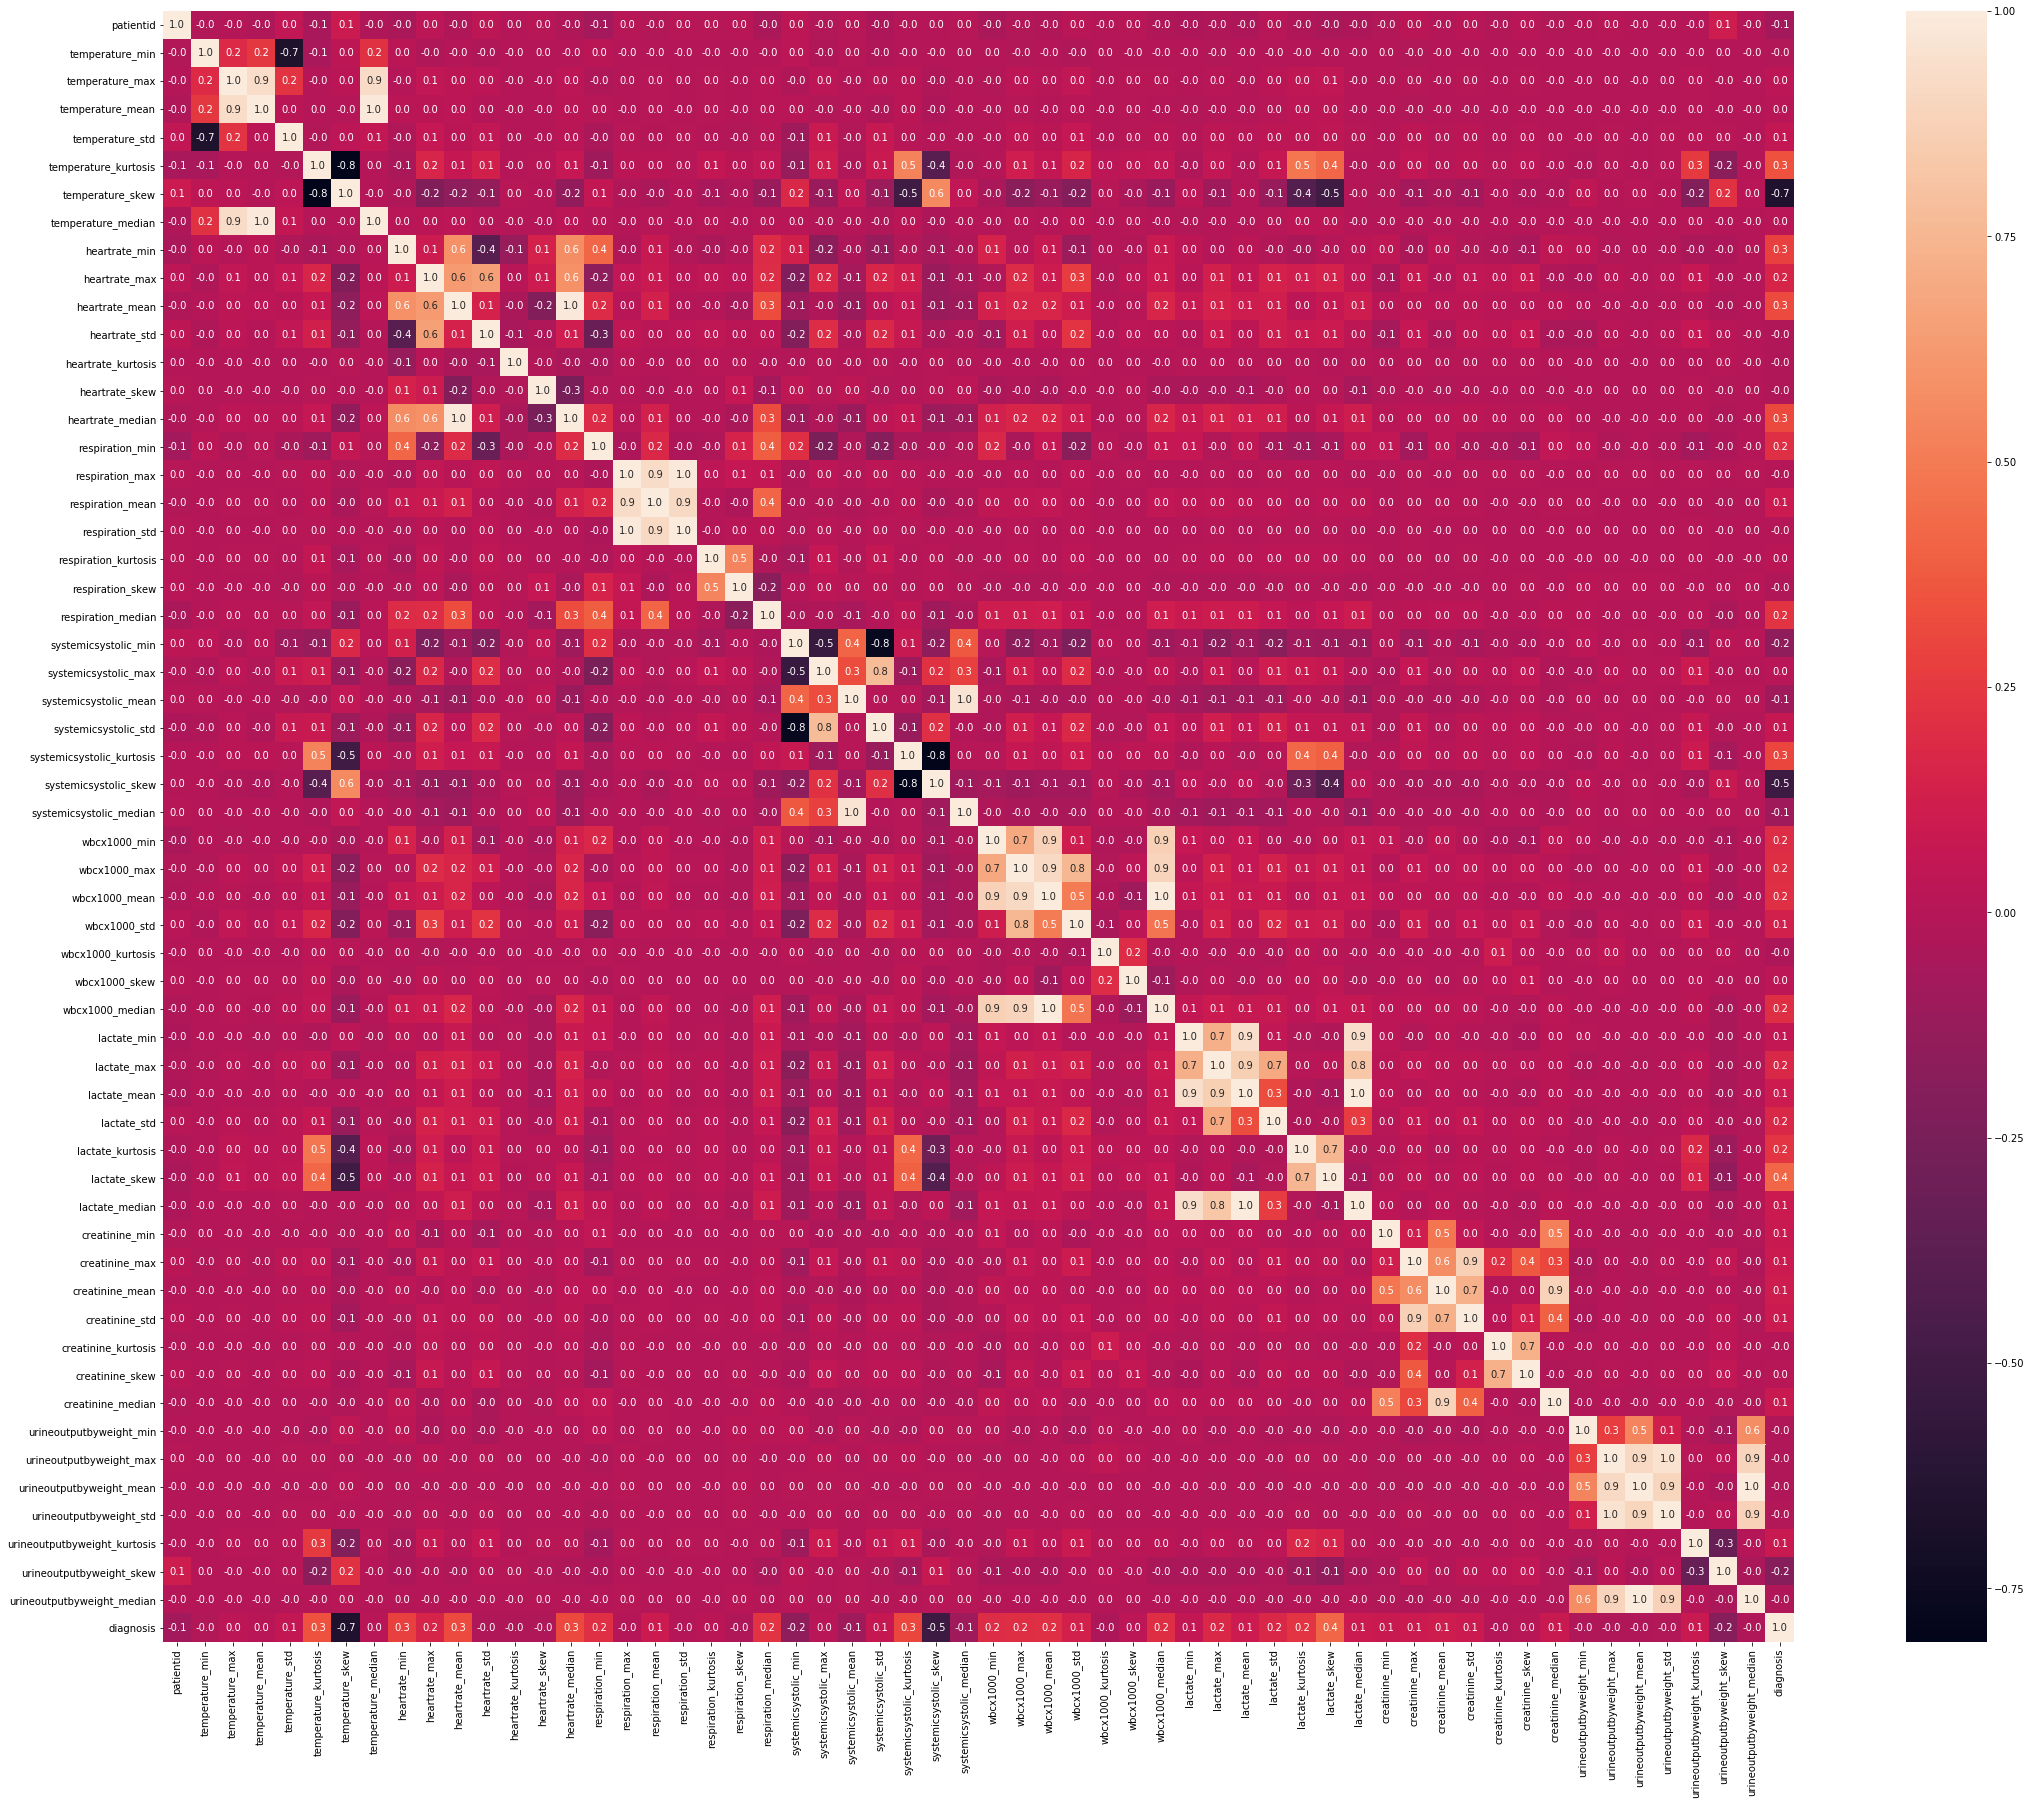

In [26]:
# Calculate correlations
corr = finalFeatures.corr()

# Plot Heatmap
f, ax = plt.subplots(figsize=(40, 30))
sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.1f');
plt.show()


As suspected the main different feature groups such as temperature and respiration don't seem to be correlated in anyway in the overall dataframe. Howver within feature group there exist strong correlations this is expected of course since these features are derived from the same data.

In [28]:
sepsisOnly = finalFeatures[finalFeatures['diagnosis'] == 1]
sepsisOnly

,patientid,temperature_min,temperature_max,temperature_mean,temperature_std,temperature_kurtosis,temperature_skew,temperature_median,heartrate_min,heartrate_max,...,creatinine_skew,creatinine_median,urineoutputbyweight_min,urineoutputbyweight_max,urineoutputbyweight_mean,urineoutputbyweight_std,urineoutputbyweight_kurtosis,urineoutputbyweight_skew,urineoutputbyweight_median,diagnosis
1,1412271,37.6965,38.1204,38.0819,0.1278,11.0000,-3.3166,38.1204,103.0000,112.0,...,0.2131,1.4000,2.4331,2.4331,2.4331,0.0000,0.0000,0.0000,2.4331,1.0
5,1412881,37.6965,38.1204,38.1114,0.0613,43.1937,-6.6884,38.1204,81.0000,105.0,...,0.0730,0.8253,6.0060,6.0060,6.0060,0.0000,0.0000,0.0000,6.0060,1.0
6,1412882,37.6965,38.1204,38.1099,0.0662,36.9158,-6.1892,38.1204,86.0000,105.0,...,0.0000,0.8700,6.0060,6.0060,6.0060,0.0000,0.0000,0.0000,6.0060,1.0
7,1412883,37.6965,38.1204,38.1107,0.0639,40.9051,-6.4780,38.1204,99.0000,105.0,...,0.0000,0.8927,6.0060,6.0060,6.0060,0.0000,0.0000,0.0000,6.0060,1.0
8,1412884,37.6965,38.1204,38.0498,0.1731,6.0000,-2.4495,38.1204,100.3333,102.0,...,0.0000,0.9467,6.0060,6.0060,6.0060,0.0000,0.0000,0.0000,6.0060,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406020,33532514,32.2000,37.7000,36.1322,2.0487,-1.0360,-0.8775,37.2000,51.0000,105.0,...,-0.7316,3.2200,0.0980,5.6373,1.3116,0.9867,1.3992,1.1697,1.1333,1.0
406021,33532515,32.2000,37.7000,35.9189,2.0949,-1.3428,-0.6828,36.9000,51.0000,105.0,...,-0.5296,3.1300,0.0980,5.6373,1.3164,1.0422,0.9901,1.1126,1.1275,1.0
406022,33532516,32.2000,37.7000,35.3112,2.1057,-1.7574,-0.2178,36.6000,51.0000,104.0,...,-0.0645,2.6469,0.0980,5.6373,1.0889,0.9895,3.4195,1.6831,0.8171,1.0
406023,33532517,32.2000,37.4000,34.5467,1.8862,-1.7703,0.2656,33.4000,51.0000,104.0,...,0.1481,2.5493,0.0980,5.6373,0.9832,1.0570,3.9619,1.9491,0.6334,1.0
